In [1]:
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import numpy as np

#pip install ipykernel (Visual Studio Code does this automatically)

In [2]:
#### Where to save or get data
output = "../Data/"
figures = "../Figures/"	

In [3]:
#### Figure settings, not needed
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5}
plt.rcParams.update(settings)

### Main CBS Data

In [4]:
def macro_data_cbs(identifier, verbose = False):
    start_date = '01/01/1995'

    if verbose:
        info = cbsodata.get_info(identifier)
        print(info)
        tables = pd.DataFrame(cbsodata.get_table_list())

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        data.to_csv(output + "unprocessed_data.csv")
        print(data.Perioden)

    data = data[data["SoortGegevens"] == 'Prijsniveau 2021, seizoengecorrigeerd']
    data = data[data['Perioden'].str.contains('kwartaal')]

    # Set up date index
    data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')
    data.index = pd.PeriodIndex(data.index, freq='Q').to_timestamp() 

    all_data = data.copy()
    # remove ID column
    all_data.drop(columns = ['ID','SoortGegevens','Perioden'], inplace = True)
    # remove Totaal columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('Totaal')]
    # remove Saldo columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('Saldo')]
    #remove CifFobCorrectie columns
    all_data = all_data.loc[:, ~all_data.columns.str.contains('CifFobCorrectie')]

    # Rename if desired: 
    all_data.rename(columns = { 'BrutoBinnenlandsProduct_2': 'gdp_total', 
                                'Goederen_4': 'imports_goods',
                                'Diensten_5': 'imports_services',
                                'Huishoudens_9': 'household_cons',
                                'Overheid_10': 'gov_consumption',
                                'BedrijvenEnHuishoudens_12': 'business_and_household_investments',
                                'Overheid_13': 'gov_investments',
                                'VeranderingInVoorraden_14': 'change_supply',
                                'Goederen_16': 'exports_goods',
                                'Diensten_17': 'exports_services'}, inplace = True)
    
    # Name columns with helpful reminders
    all_data.columns = [col + "_seasonCorrected" for col in all_data.columns]

    # Just a check
    print("Data Dimensions: ", all_data.shape)
  
    return all_data

C:\Users\jpark\AppData\Local\Temp\ipykernel_6688\3722144246.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')


Data Dimensions:  (119, 152)


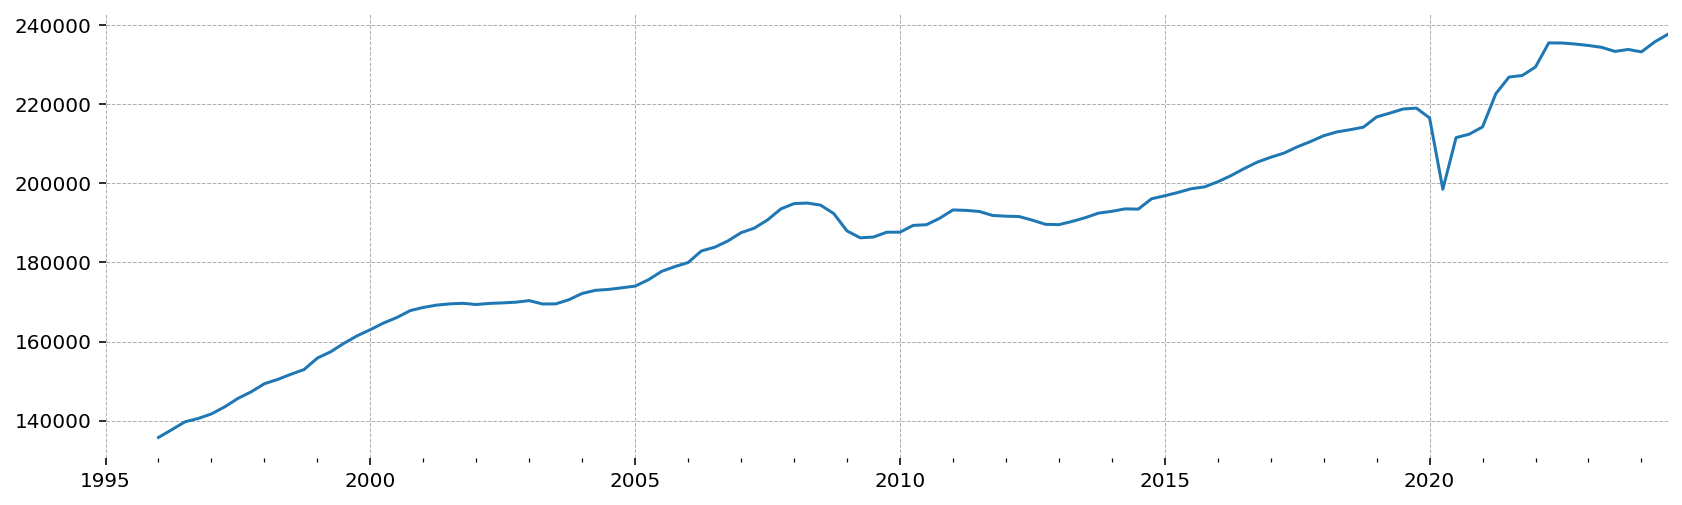

In [5]:
NLD_basic_macro_data = macro_data_cbs(identifier = '85879NED', verbose = False)
NLD_basic_macro_data.to_csv(output + "cbs_basic_macro_NOT_SEASONCORRECTED_qt.csv")

# Example plot
NLD_basic_macro_data['gdp_total_seasonCorrected'].plot()
plt.savefig(figures + "gdp_total_seasonCorrected.png")


### CBS Confidence Indicators

C:\Users\jpark\AppData\Local\Temp\ipykernel_6688\4272577048.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start = start_date, periods = data.shape[0], freq="M").to_period('M')


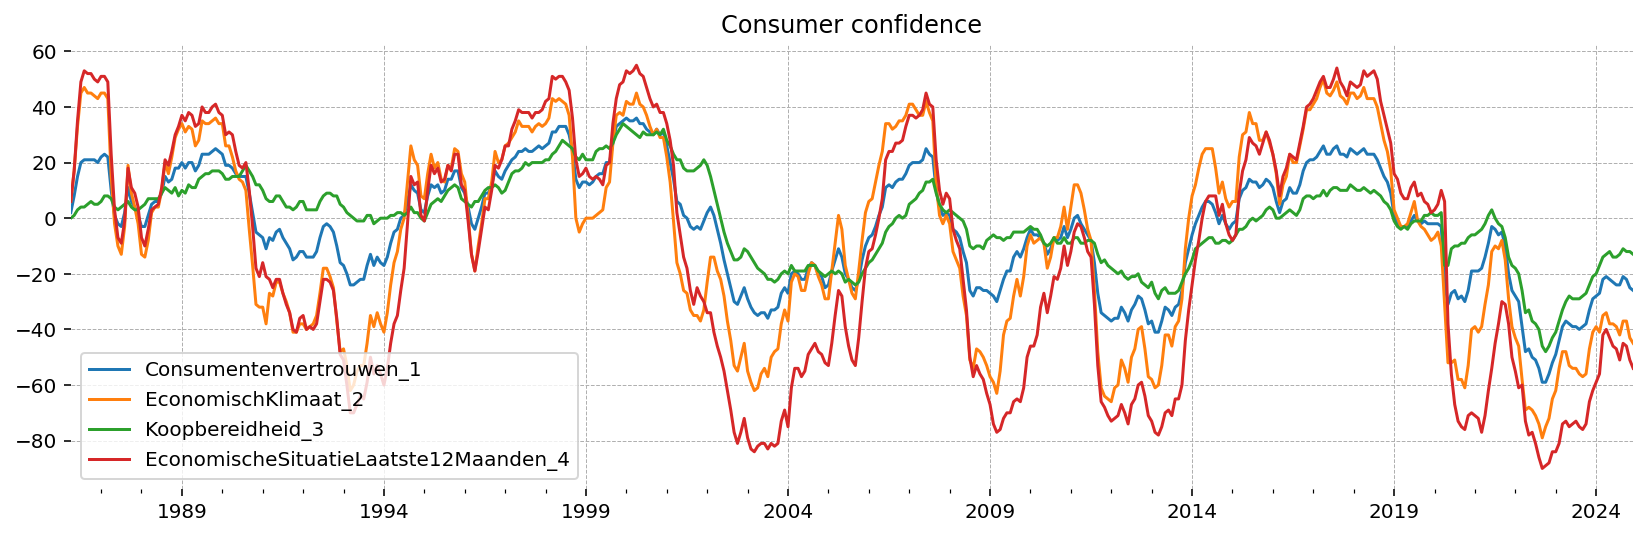

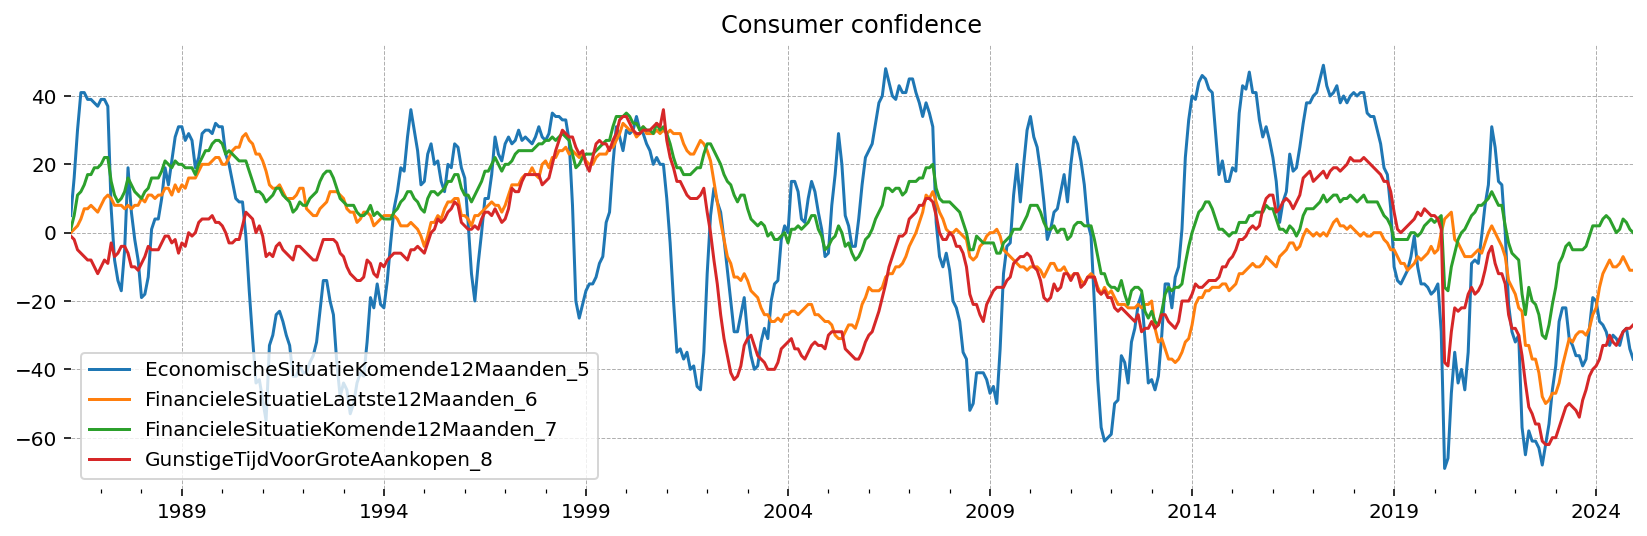

In [6]:
def consumer_confidence_cbs(identifier, verbose = False):

    start_date = '04/01/1986'
    
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)
        data.to_csv("consumer_vertrouw.csv")

    data = data[(data['Perioden'].str.len()) > 4]
    data = data[['Consumentenvertrouwen_1', 'EconomischKlimaat_2', 'Koopbereidheid_3', 'EconomischeSituatieLaatste12Maanden_4', 'EconomischeSituatieKomende12Maanden_5', 'FinancieleSituatieLaatste12Maanden_6', 'FinancieleSituatieKomende12Maanden_7', 'GunstigeTijdVoorGroteAankopen_8']]

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start = start_date, periods = data.shape[0], freq="M").to_period('M')
    data.index = pd.PeriodIndex(data.index, freq='M').to_timestamp()  

    return data

consumer_confd_mo = consumer_confidence_cbs('83693NED', verbose = False)
consumer_confd_mo.to_csv(output +"cbs_consumer_confd_mo.csv")


# Plots
consumer_confd_mo[['Consumentenvertrouwen_1', 'EconomischKlimaat_2', 'Koopbereidheid_3', 'EconomischeSituatieLaatste12Maanden_4']].plot()
plt.title('Consumer confidence')
plt.savefig(figures + "consumer_confd_1_mo.png")

consumer_confd_mo[['EconomischeSituatieKomende12Maanden_5', 'FinancieleSituatieLaatste12Maanden_6', 'FinancieleSituatieKomende12Maanden_7', 'GunstigeTijdVoorGroteAankopen_8']].plot()
plt.title('Consumer confidence')
plt.savefig(figures + "consumer_confd_2_mo.png")

### CBS Wages

wage_cbs


C:\Users\jpark\AppData\Local\Temp\ipykernel_6688\2863407037.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start=start_date, periods = data.shape[0], freq="Q").to_period('Q')


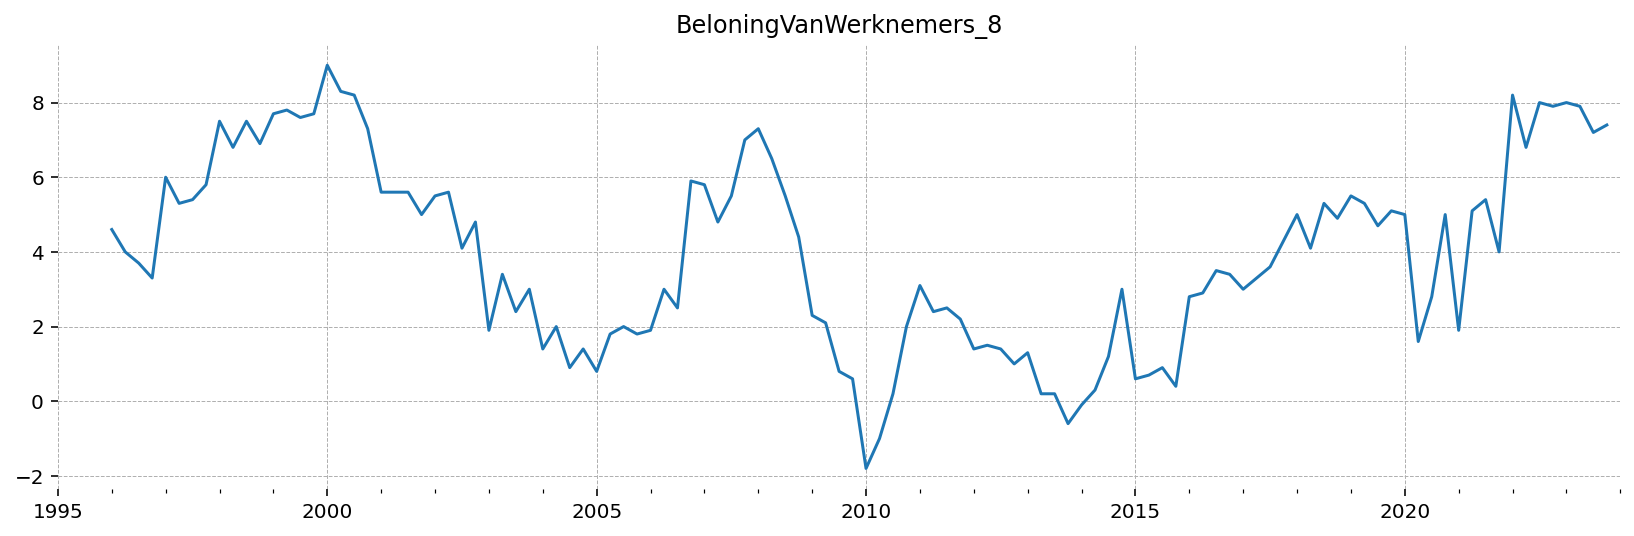

In [7]:
def wage_cbs(identifier, verbose = False):
    print("wage_cbs")
    start_date = '01/01/1995'

    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)
        print(data.Perioden)

    data = data[data['BedrijfstakkenBranchesSBI2008'] == 'A-U Alle economische activiteiten']
    data = data[(data['Perioden'].str.len()) > 4]

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start=start_date, periods = data.shape[0], freq="Q").to_period('Q')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index,freq='Q').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    data = data[['BeloningSeizoengecorrigeerd_2', 'Loonkosten_7', 'BeloningVanWerknemers_8']]

    return data

wages_qt = wage_cbs('84163NED', verbose = False)
wages_qt.to_csv(output + "cbs_wages_qt.csv")

wages_qt['BeloningVanWerknemers_8'].plot()
plt.title('BeloningVanWerknemers_8')
plt.savefig(figures + "cbs_wages_qt.png")

### Bankruptcies

C:\Users\jpark\AppData\Local\Temp\ipykernel_6688\3663315559.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start=start_date, periods=data.shape[0], freq="M").to_period('M')


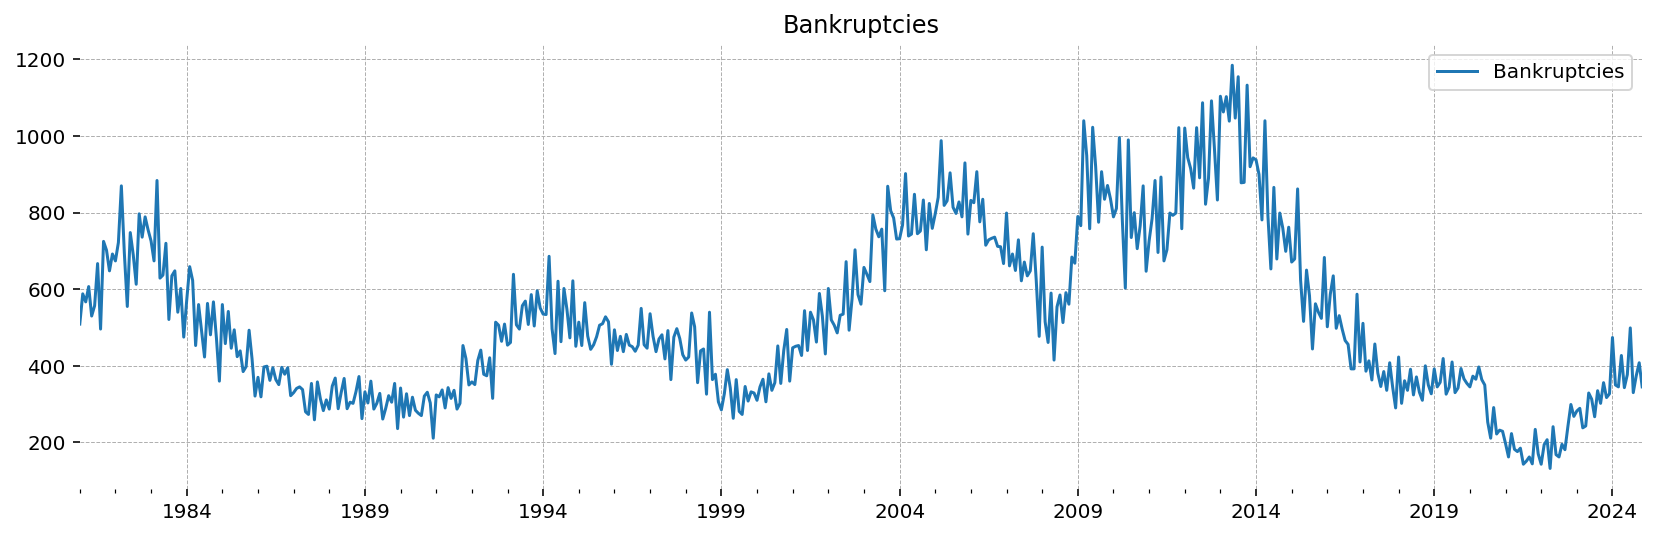

In [8]:

def bankrupt_cbs(identifier, verbose = False):
  
    start_date = '01/01/1981'
    
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        print(data)

    # remove jaardata
    data = data[(data['Perioden'].str.len()) > 4]
    # remove kwarteldata
    filter = data['Perioden'].str.contains('kwartaal')
    data = data[~filter]

    data = data[data['TypeGefailleerde'] == 'Totaal rechtsvormen Nederland/buitenland']
    data.drop(columns=['ID'], inplace=True)

    data = data[['UitgesprokenFaillissementen_1']]
    data.columns = ['Bankruptcies']

    ######################
    # Set data index
    ######################
    data.index = pd.date_range(start=start_date, periods=data.shape[0], freq="M").to_period('M')

    # this adds one day, so end jan becomes first feb
    data.index = pd.PeriodIndex(data.index, freq='M').to_timestamp()  # + datetime.timedelta(days=1) #pd.offsets.MonthEnd()

    return data

bankrupt_mo = bankrupt_cbs('82242NED', verbose = False)
bankrupt_mo.to_csv(output + "cbs_bankrupt_mo.csv")

bankrupt_mo.plot()
plt.title('Bankruptcies')
plt.savefig(figures + "Bankruptcies.png")